In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path="datasets_coursea_data.csv"

In [3]:
data = pd.read_csv(path)
print(data.shape)
data.head()

(891, 7)


,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


### Data Preprocessing

In [4]:
# replacing Unnamed: 0 column with Id
# data['Id'] = data['Unnamed: 0']
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.9+ KB


### Data Pre-processing
As we can see that the column course_students_enrolled is of the type object. That is due to the "k" or "m" after the number. We need to deal with that before starting any analysis.

In [6]:
std_enroll = []
for i in range(0, len(data)):
    try:
        num = data['course_students_enrolled'].str.split('k')[i][0]
        num = float(num) * 1000 
        std_enroll.append(num)
    except:
        num = data['course_students_enrolled'].str.split('m')[i][0]
        num = float(num) * 1000000
        std_enroll.append(num)
data['course_students_enrolled'] = std_enroll
data['course_students_enrolled'] = data['course_students_enrolled'].astype(float)

In [7]:
data.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


### 1. Which organization has the most number of courses?
Here, we want to check two things. First, which organization has the most number of courses on Coursera.
Next, which all organizations have more than 10 courses on coursera. This is just a basic analysis which could show the organizations which dominate on Coursera.

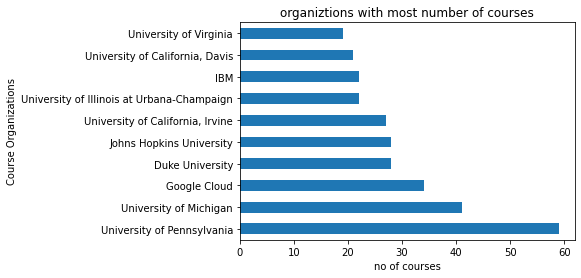

In [8]:
#Top 10 organizations
data['course_organization'].value_counts()[:10].plot(kind='barh',title='organiztions with most number of courses')
plt.xlabel('no of courses')
plt.ylabel('Course Organizations')
plt.show()

<class 'pandas.core.series.Series'>


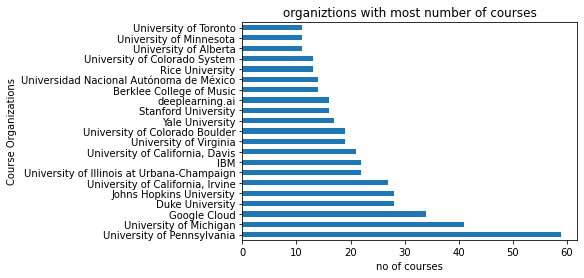

In [9]:
#organizations with more than 10 courses
a=data['course_organization'].value_counts()
print(type(a))
a=a[a>10]
a.plot(kind='barh',title='organiztions with most number of courses')
plt.xlabel('no of courses')
plt.ylabel('Course Organizations')
plt.show()

### 2.  Average course rating of the organizations with more than 10 courses
Here, we want to see whether these organizations produce quality courses or is it just quantity over quality?

In [10]:
avg_course_rating = (data.groupby('course_organization')['course_rating'].mean()).to_dict()
avg_course_rating

{'(ISC)²': 4.733333333333333,
 'Amazon Web Services': 4.55,
 'American Institute of Business and Economics': 4.4,
 'American Museum of Natural History': 4.75,
 'Arizona State University': 4.771428571428571,
 'Atlassian': 4.75,
 'Autodesk': 4.75,
 'Automation Anywhere': 4.6,
 'BCG': 4.8,
 'Berklee College of Music': 4.807142857142856,
 'Birkbeck, University of London': 4.6,
 'Bloomsbury Learning Exchange': 4.7,
 'California Institute of the Arts': 4.716666666666667,
 'Case Western Reserve University': 4.733333333333333,
 'Cisco': 4.7,
 'Cloudera': 4.8,
 'Columbia University': 4.757142857142857,
 'ConsenSys Academy': 4.7,
 'Copenhagen Business School': 4.68,
 'Crece con Google': 4.9,
 'Duke University': 4.664285714285714,
 'E-Learning Development Fund': 4.733333333333333,
 'EDHEC Business School': 4.666666666666666,
 'ESADE Business and Law School': 4.8,
 'ESCP Business School': 4.6,
 'ESSEC Business School': 4.6,
 'Eindhoven University of Technology': 4.8,
 'Emory University': 4.4999999

In [11]:
a=a.to_frame()
a

,course_organization
University of Pennsylvania,59
University of Michigan,41
Google Cloud,34
Duke University,28
Johns Hopkins University,28
"University of California, Irvine",27
University of Illinois at Urbana-Champaign,22
IBM,22
"University of California, Davis",21
University of Virginia,19


In [12]:
orgs = a.index.to_list()
print(orgs)
avg_rating = []
for i in orgs:
    for key, value in avg_course_rating.items():
        if key == i:
            avg_rating.append(value)
        else:
            continue
a['avg_rating']=avg_rating
a

['University of Pennsylvania', 'University of Michigan', 'Google Cloud', 'Duke University', 'Johns Hopkins University', 'University of California, Irvine', 'University of Illinois at Urbana-Champaign', 'IBM', 'University of California, Davis', 'University of Virginia', 'University of Colorado Boulder', 'Yale University', 'Stanford University', 'deeplearning.ai', 'Berklee College of Music', 'Universidad Nacional Autónoma de México', 'Rice University', 'University of Colorado System', 'University of Alberta', 'University of Minnesota', 'University of Toronto']


,course_organization,avg_rating
University of Pennsylvania,59,4.696610
University of Michigan,41,4.729268
Google Cloud,34,4.582353
Duke University,28,4.664286
Johns Hopkins University,28,4.660714
"University of California, Irvine",27,4.596296
University of Illinois at Urbana-Champaign,22,4.654545
IBM,22,4.613636
"University of California, Davis",21,4.619048
University of Virginia,19,4.715789


In [13]:
a.rename(columns={"course_organization": "no of courses offered"},inplace=True)
a.index.names=['course_organization']

In [14]:
a

,no of courses offered,avg_rating
course_organization,,
University of Pennsylvania,59,4.696610
University of Michigan,41,4.729268
Google Cloud,34,4.582353
Duke University,28,4.664286
Johns Hopkins University,28,4.660714
"University of California, Irvine",27,4.596296
University of Illinois at Urbana-Champaign,22,4.654545
IBM,22,4.613636
"University of California, Davis",21,4.619048


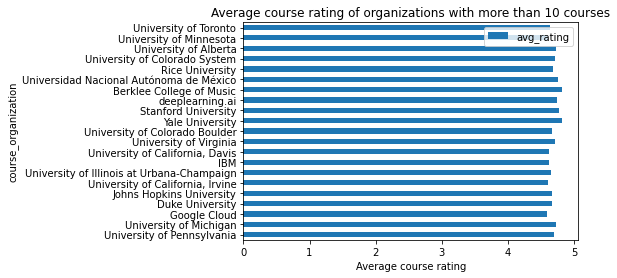

In [15]:
a.plot(kind='barh',y='avg_rating')
plt.title('Average course rating of organizations with more than 10 courses')
plt.xlabel('Average course rating')
plt.show()

### 3. Which organization has the highest course rating?
What do you think? Will the organization with highest course rating have more than 10 courses?

In [16]:
avg_course_rating
sort_avg_course_rating = {k: v for k, v in sorted(avg_course_rating.items(), key=lambda item: item[1], reverse=True)}
#sort_avg_course_rating = sorted(avg_course_rating.items(), key=lambda x: x[1], reverse=True)

In [17]:
sort_avg_course_rating

{'Crece con Google': 4.9,
 'Google - Spectrum Sharing': 4.9,
 'Hebrew University of Jerusalem': 4.9,
 'London Business School': 4.9,
 'Nanyang Technological University, Singapore': 4.9,
 'ScrumTrek': 4.9,
 'Universidade Estadual de Campinas': 4.9,
 'Universidade de São Paulo': 4.866666666666667,
 'The University of Chicago': 4.85,
 'Universidad de los Andes': 4.82,
 'Yale University': 4.817647058823529,
 'Berklee College of Music': 4.807142857142856,
 'BCG': 4.8,
 'Cloudera': 4.8,
 'ESADE Business and Law School': 4.8,
 'Eindhoven University of Technology': 4.8,
 'Institute for the Future': 4.8,
 'Kalshoven-Gieskes Forum': 4.8,
 'Macquarie University': 4.8,
 'McMaster University': 4.8,
 'Osmosis': 4.8,
 'Peking University': 4.8,
 'Relay Graduate School of Education': 4.8,
 'Shanghai Jiao Tong University': 4.8,
 'Tel Aviv University': 4.8,
 'The George Washington University': 4.8,
 'The Pennsylvania State University': 4.8,
 'The University of Hong Kong': 4.8,
 'The University of Tokyo':

In [18]:
for key, value in sort_avg_course_rating.items():
    if value == 4.9:
        print(key)

Crece con Google
Google - Spectrum Sharing
Hebrew University of Jerusalem
London Business School
Nanyang Technological University, Singapore
ScrumTrek
Universidade Estadual de Campinas


### 4. Top 5 courses on Coursera
Let's look at the top 5 courses on Coursera by course rating

In [19]:
sorted_course_rating = data.sort_values(by='course_rating', ascending=False)

In [20]:
sorted_course_rating[["course_title","course_rating"]][:5]

,course_title,course_rating
251,El Abogado del Futuro: Legaltech y la Transfor...,5.0
432,Infectious Disease Modelling,5.0
754,Stories of Infection,4.9
290,Everyday Parenting: The ABCs of Child Rearing,4.9
98,Boosting Creativity for Innovation,4.9


### 5. Does course difficulty affect number of students enrolled?
For this we will check the average number of students enrolled grouping by difficulty.

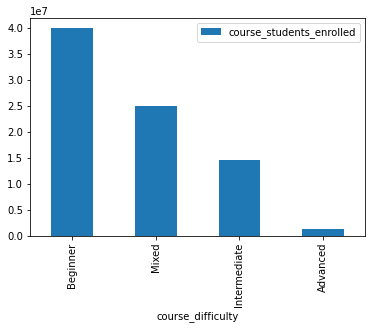

In [21]:
no_of_students_course_difficulty = (data.groupby("course_difficulty")[["course_students_enrolled"]].sum()).sort_values(by="course_students_enrolled", ascending=False)
no_of_students_course_difficulty.plot.bar()
plt.show()

### 6. Does course difficulty affect rating?
Do courses with advanced level of difficulty get lower rating? Is there any relation between the two?

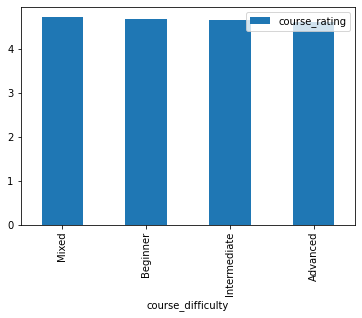

In [22]:
rating_course_difficulty = (data.groupby("course_difficulty")[["course_rating"]].mean()).sort_values(by="course_rating", ascending=False)
rating_course_difficulty.plot.bar()
plt.show()

### 7. Does certificate type impact number of students enrolled?
This could be a very important question for Coursera and for the organizations who are making courses. What type of certificate should be there for maximum student enrollment and how should Coursera optimize the course recommendations based on the type of certificates?

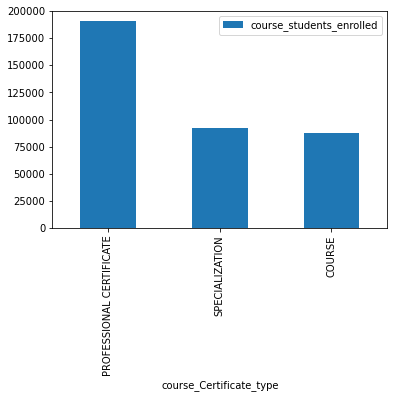

In [23]:
ctft_students = (data.groupby("course_Certificate_type")[["course_students_enrolled"]].mean()).sort_values(by="course_students_enrolled", ascending=False)
ctft_students.plot.bar()
plt.show()

### 8. Does certificate type impact course rating?
Do professional certificates have a higher rating because they are accepted everywhere or is there still no impact?

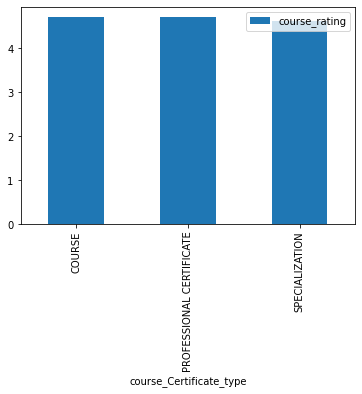

In [24]:
ctft_rating = (data.groupby("course_Certificate_type")[["course_rating"]].mean()).sort_values(by="course_rating", ascending=False)
ctft_rating.plot.bar()
plt.show()

### 9. Number of students enrolled vs. course rating
If there a large number of students enrolled in your course, does that impact the course rating?

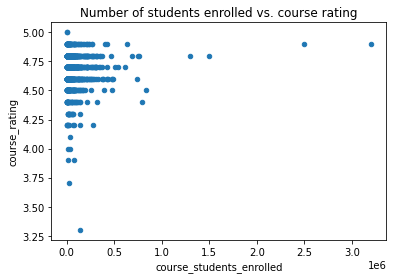

In [25]:
data.plot(kind='scatter', x='course_students_enrolled', y='course_rating', title='Number of students enrolled vs. course rating')

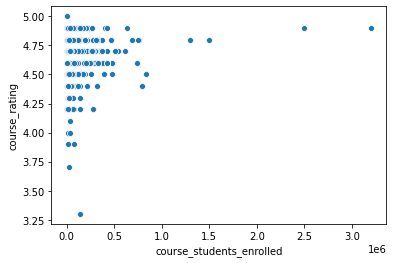

In [26]:
sns.scatterplot(x="course_students_enrolled", y="course_rating", data=data)

In [27]:
data.corr()

,course_rating,course_students_enrolled
course_rating,1.00000,0.07109
course_students_enrolled,0.07109,1.00000


### Conclusion
- University of Pennsylvania has most number of courses on Coursera followed by University of Michigan.
- Organizations with more than 10 courses on Coursera are not present in the top 5 organizations list with highest rating.
- Course difficulty does affect the number of students enrolled. There are more students enrolled in Beginner and Mixed level of difficulty courses than Intermediate and Advanced.
- Course difficulty does not affect course rating.
- Course certificate type does impact the number of students enrolled in that course. More number of students tend to enroll for Professional Certificate courses than just "COURSE" certificate.
- Certificate type does not impact course rating.
- There is no strong relation to prove that if more number of students are enrolled in a course, the course rating is a higher.